# Temperature

Investigates the temperature readings to make sure that no experiment ran under too high temperatures

## Import temperature data

In [24]:
import os
import re
import pandas
import matplotlib

def load_temperature_data(folder_name: str):
    return_data = {}
    experiment_run_count = 0

    for file_name in os.listdir(folder_name):

        if file_name.endswith(".csv") and "_temperature_" in file_name:
            file_path = os.path.join(folder_name, file_name)

            with open(file_path, 'r') as file:
                content = file.read()

                pre_temp_match = re.search(r'CPU Temperature Pre experiment: ([\d.]+)', content)
                post_temp_match = re.search(r'CPU Temperature Post experiment: ([\d.]+)', content)

                if pre_temp_match and post_temp_match:
                    experiment_name = file_name.split("_temperature")[0]

                    pre_temp = float(pre_temp_match.group(1))
                    post_temp = float(post_temp_match.group(1))
                    
                    return_data[f"{experiment_name}-{experiment_run_count}"] = {
                        'file': file_name,
                        'pre-temperature': pre_temp,
                        'post-temperature': post_temp
                    }

                    experiment_run_count = experiment_run_count + 1

    return return_data


data_folder = "./data"

data = {}
data_pre_temperature_key = "pre-temperature"
data_post_temperature_key = "post-temperature"

dotnet_folder = os.path.join(data_folder, "dotnet")
golang_folder = os.path.join(data_folder, "golang")
java_folder = os.path.join(data_folder, "java")
node_folder = os.path.join(data_folder, "node")
python_folder = os.path.join(data_folder, "python")
ruby_folder = os.path.join(data_folder, "ruby")
rust_folder = os.path.join(data_folder, "rust")

data.update(load_temperature_data(dotnet_folder))
data.update(load_temperature_data(golang_folder))
data.update(load_temperature_data(java_folder))
data.update(load_temperature_data(node_folder))
data.update(load_temperature_data(python_folder))
data.update(load_temperature_data(ruby_folder))
data.update(load_temperature_data(rust_folder))

print(len(data.keys()))


113


## Min and Max of Pre and Post Temperature Readings

In [34]:
import pandas as pd

pd_pre_temperature_key = "pre-temperature"
pd_post_temperature_key = "post-temperature"

pd_data = pd.DataFrame({
    pd_pre_temperature_key: [data[key][data_pre_temperature_key] for key in data.keys()],
    pd_post_temperature_key: [data[key][data_post_temperature_key] for key in data.keys()]
})

min_pre_temp = pd_data[pd_pre_temperature_key].min()
max_pre_temp = pd_data[pd_pre_temperature_key].max()

min_post_temp = pd_data[pd_post_temperature_key].min()
max_post_temp = pd_data[pd_post_temperature_key].max()

print(f"Minimum Pre Temperature: {min_pre_temp}")
print(f"Maximum Pre Temperature: {max_pre_temp}")

print(f"Minimum Post Temperature: {min_post_temp}")
print(f"Maximum Post Temperature: {max_post_temp}")

Minimum Pre Temperature: 42.355
Maximum Pre Temperature: 46.738
Minimum Post Temperature: 43.329
Maximum Post Temperature: 50.634


We can see that the minimum post temperature is around the minimum pre temperature, which means that not all experiment runs has necessarily started at the same temperature. Though, we are no where near the thermal throttling limits

## Visualization

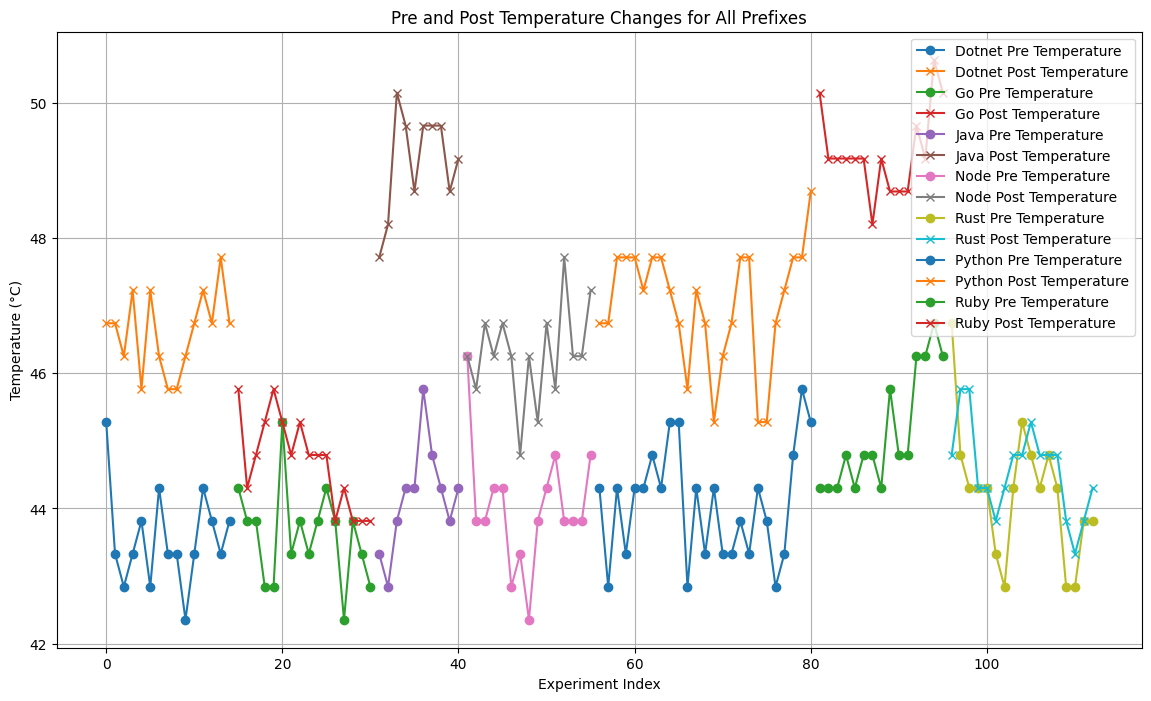

In [37]:
import matplotlib.pyplot as plt

# Extract unique prefixes from the keys
prefixes = set(key.split('-')[0] for key in data.keys())

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plot data for each prefix
for prefix in prefixes:
    # Filter data for the current prefix
    filtered_data = pd_data.loc[[key.startswith(prefix) for key in data.keys()]]
    
    # Plot pre and post temperatures
    plt.plot(filtered_data.index, filtered_data[pd_pre_temperature_key], label=f'{prefix.capitalize()} Pre Temperature', marker='o')
    plt.plot(filtered_data.index, filtered_data[pd_post_temperature_key], label=f'{prefix.capitalize()} Post Temperature', marker='x')

# Add labels, title, and legend
plt.xlabel('Experiment Index')
plt.ylabel('Temperature (°C)')
plt.title('Pre and Post Temperature Changes for All Prefixes')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()